# Classifying Stars in Star Clusters

> Just like you can classify a galaxy based on its appearance, you can classify a star based on its color, temperature and size. 
With the use of a variety of telescopes, astronomers are able map the night sky, and find a variety of star clusters in the milky way. In this lesson, you will be tasked with creating two Hertzsprung-Russell Diagrams of two different well knows star clusters. The data that you will be using comes from the National Optical Astronomy Observatory (NOAO) Data Lab and Gaia.
##### NOAO Data Lab
> NOAO Data Lab combines stellar datasets, collected from instruments under NOAO, with the goal of providing this data to the public. They want people to use their data in individual science peojects because they believe that it is important for scientists to engage as much as possible with the data. You can visit their website for more information [here](https://datalab.noao.edu/about.php)

##### Gaia 
> Gaia is a satellite space observatory, launched by the European Space Agency (ESA) with the goal to chart a three dimensional map of the milky way galaxy. This spacecraft measures the positions, distances, and motions of the stars which is all used to create this map. The data that Gaia has collected will be available for you to use through Data lab to construct your HR diagrams.

### Initial imports

In [45]:
import numpy as np
import datalab as dl
import pandas as pd
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert

In [46]:
from astropy import utils, io, convolution, wcs
from astropy.visualization import make_lupton_rgb
from astropy.coordinates import name_resolve

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### The Hertzsprung-Russell Diagram
> ![HR diagram](hrdiagram.jpeg)
>
> The Hertzsprung-Russell Diagram (HR Diagram) is a tool that astronomers use to show the classification of stars, while also showing the life and evolution of said stars. This diagram plots the luminosity as a function of the temperature of the star. Other HR diagrams can show the absolute magnitude as a function of the spectral type of the star. 
###### [Image Reference](https://www.thoughtco.com/hertzsprung-russell-diagram-4134689)
#### Main Sequence Stars
> This is the main strip of stars that starts from the upper left of the graph and goes to the lower right. The stars in the upper left represent very hot, luminous stars, where the stars in the bottom right represent cooler, dimmer stars. The main sequence is where stars spend most of their lives.

#### Giant and Supergiant Stars
> Stars become giants or supergiants towards the end of their lives. The surface temperature of the star starts to cool, and they start to grow in size making them more luminous. Stars enter this phase when they run out of hydrogen to fuse, so they start to fuse helium or heavier elements depending on the mass of the star.

#### White Dwarf Stars
> Stars in this region show the final evolutionary stage of low to intermediate mass stars; a high-mass star will not become a white dwarf star, they tend to end their lives as supernovas, or as a black hole. White dwarf stars are very hot, but they aren't very bright due to their small size.

###### [Reference](http://astronomy.swin.edu.au/cosmos/H/Hertzsprung-Russell+Diagram)
 
### Goals
>Get comfortable with using Gaia data to create an HR Diagram.
>
>Be able to understand and describe the HR Diagram.
>
>Be able to make a scatter plot of the star data, and explain how your result is an example of an HR Diagram.





![m67](M67_Cluster.png)



> The graph above is very busy with data points, which can make it easy to lose the various locations of the HR diagram. This  is due to stars that may be in the path between Earth and M67. A good way to clean up the data is to find where the parallax angles are the most similar. The parallax effect is the apparant difference in position of an object depending on where you view the object. This effect is illustrated in the graphic below. Similar parallax angles mean that the stars are relatively close together. Finding where angles are most similar in the data, helps reduce the chance of plotting stars that are not in the cluster.
>  


![Parallax](parallax.png)

###### [Image referance](https://socratic.org/questions/how-do-astronomers-use-parallax-to-study-stars)
>
>To find the parallax value you will access the Gaia database through datalab.  
>For M67, find the max and min values of RA and Dec in the table, and then use these values to limit the search in your query.  
>


In [1]:
# Read in the .csv file for the M67 cluster using pandas

data1 = pd.read_csv("M67.csv")  

NameError: name 'pd' is not defined

In [5]:
# Find the maximum and minimum values in the data
# print and record the RA and Dec values

max1 = data1.max()
min1 = data1.min()
print(max1, min1)

#RA      133.107995
DEC       12.120995
B         16.719800
V         12.573700
B-V        5.653080
M_V       -1.396300
13.97           NaN
dtype: float64 #RA      132.563571
DEC       11.599563
B         -1.167250
V         -2.298330
B-V       -1.471920
M_V      -16.268330
13.97           NaN
dtype: float64


In [6]:
# Define your query.
# remember syntax: variable = """SELECT...
#                                FROM...
#                                WHERE...
#                                AND..."""
# Before the query, set variables for Ra and Dec to limit the search. 
# amke sure that you format your query to your variables

ramin1, ramax1, decmin1, decmax1 = 132.563571, 133.107995, 11.599563, 12.120995

query = """

SELECT ra,dec,parallax,phot_g_mean_mag,bp_rp 
FROM gaia_dr2.gaia_source
WHERE ra > {:f}
AND ra < {:f}
AND dec > {:f}
AND dec < {:f} 
    
""".format(ramin1, ramax1, decmin1, decmax1)

In [7]:
# Make your query with the queryClient and set it to a variable.

result1 = qc.query(sql=query)

In [8]:
# Convert your result to pandas.
# After print your variable.
# Do we want to keep all of this data? Explain your reasoning.

df1 = convert(result1,'pandas')
#print(df)

In [9]:
# Get rid of any NA values that may appear in the data.
# Print the data again and make sure that the NA values are gone.

df_no_missing1 = df1.dropna()
#print(df_no_missing)

(0.8, 1.5)

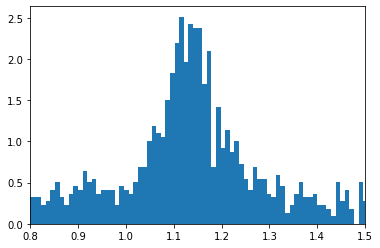

In [10]:
# Make a histogram of the parallax data to find the peak.
# What does this peak corrispond to?


plt.hist(df_no_missing1['parallax'], density=True, bins=2500)
axes = plt.gca()
axes.set_xlim([.8,1.5])

In [56]:
# Limit your query with the appropriate parallax values. 
# Using the histogram plotted before, create appropriate parameters for your parallax values.


ramin, ramax, decmin, decmax = 132.563571, 133.107995, 11.599563, 12.120995

query1 = """

SELECT ra,dec,parallax,phot_g_mean_mag,bp_rp FROM gaia_dr2.gaia_source
    WHERE ra > {:f}
    AND ra < {:f}
    AND dec > {:f}
    AND dec < {:f} 
    AND parallax > 1.0
    AND parallax < 1.3
    
""".format(ramin, ramax, decmin, decmax)

In [57]:
# Make your query with the queryClient and set it to a variable.

result = qc.query(sql=query1)

In [58]:
# Convert your result to pandas.
# Get rid of any NA values that may appear in the data.

df = convert(result,'pandas')
df_no_na = df.dropna()

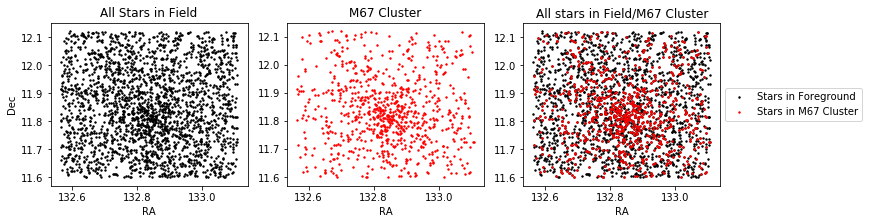

In [69]:
# Create three RA/Dec subplots to show the stars in the cluster and the stars in the foreground


plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(df_no_missing1['ra'],df_no_missing1['dec'],s=2, color = 'k')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('All Stars in Field')



plt.subplot(1,3,2)
plt.scatter(df_no_na['ra'],df_no_na['dec'],s=2, color = 'r')
plt.xlabel('RA')
plt.title('M67 Cluster')


plt.subplot(1,3,3)
all_stars = plt.scatter(df_no_missing1['ra'],df_no_missing1['dec'],s=2, color = 'k')
cluster = plt.scatter(df_no_na['ra'],df_no_na['dec'],s=2, color = 'r')
plt.xlabel('RA')
plt.title('All stars in Field/M67 Cluster')
plt.legend([all_stars, cluster], ['Stars in Foreground', 'Stars in M67 Cluster'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [60]:
# Convert your parallax to abs_mag

d_pc = 1 / (df_no_na['parallax'] * 1e-3) # distance [pc]
abs_mag = df_no_na['phot_g_mean_mag'] - 5*np.log10(d_pc)-5

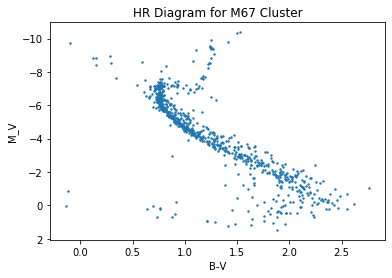

In [61]:
# Make a scatter plot of your data.
# What does this scatter plot show?
# Make sure to label your axies and give it a title.

plt.scatter(df_no_na['bp_rp'],abs_mag,s=2)
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('M_V')
plt.title('HR Diagram for M67 Cluster')


In [2]:
# What can you tell about the age of this star cluster based on the position of the stars?
#

In [17]:
# Now we are going to aquire our data only from Gaia.
# Below you are given 2 functions:
# The first allows you to get coordinates for a cluster if you input the name into the function.
# The second allows you create a table of all the data around the point at a certain radius.
#
# The second function is a very basic outline think of the data that you will need for your HR diagram. 
# In the function, use the data to create a column for the absoulte magnitude, and get rid of any Na values.

def resolve_coordinates(name):
    try:
        coords = name_resolve.get_icrs_coordinates(name)
    except Exception as e:
        raise

    ra = coords.ra.to('deg').value
    dec = coords.dec.to('deg').value      

    return coords, ra, dec

def getData(ra,dec,radius=1,columns='*'):
    
    query1 =\
    """SELECT {0} FROM gaia_dr2.gaia_source
       WHERE q3c_radial_query(ra,dec,{1},{2},{3})"""
    
    query = query1.format(columns,ra,dec,radius)
    result = qc.query(sql=query) # by default the result is a CSV formatted string
    df = convert(result,'pandas')
    
    d_pc = 1 / (df['parallax'] * 1e-3)
    df['abs_mag'] = df['phot_g_mean_mag'] - 5*np.log10(d_pc)-5
    data = df.dropna()
    
    
    return data

In [18]:
# Call the 'resolve_coordinates' function to get your RA and Dec values.

resolve_coordinates('Pleiades')

(<SkyCoord (ICRS): (ra, dec) in deg
     (56.75, 24.11666667)>, 56.75, 24.11666667)

In [19]:
# Now call the 'getData' function using the RA and Dec you just found. Also make sure that you call the correct data by 
# including the appropriate columns.

data = (getData(56.75, 24.11666667,radius=1,columns='ra,dec,parallax,phot_g_mean_mag,bp_rp'))

/home/desi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


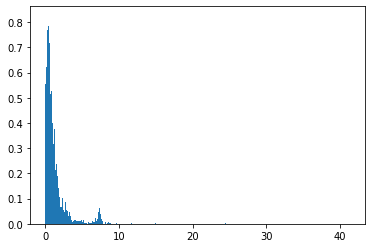

In [20]:
# You are now going to analize the parallax.
# You should notice that you get 2 peaks. Which one should you use? Justify your answer.

plt.hist(data['parallax'], density=True, bins=2500)
axes = plt.gca()
#axes.set_xlim([6,9])
#axes.set_ylim([0.0,.075])

In [40]:
# Make a function similar to 'getData', but limit your data using the parallax

def getData(ra,dec,radius=1,columns='*'):
    
    query1 =\
    """SELECT {0} FROM gaia_dr2.gaia_source
       WHERE q3c_radial_query(ra,dec,{1},{2},{3})
       AND parallax > 7
       AND parallax < 7.6"""
    
    query = query1.format(columns,ra,dec,radius)
    result = qc.query(sql=query) # by default the result is a CSV formatted string
    df = convert(result,'pandas')
    
    d_pc = 1 / (df['parallax'] * 1e-3)
    df['abs_mag'] = df['phot_g_mean_mag'] - 5*np.log(d_pc)-5
    data = df.dropna()
    
    
    return data

In [41]:
data3 = (getData(56.75, 24.11666667,radius=1,columns='ra,dec,parallax,phot_g_mean_mag,bp_rp'))

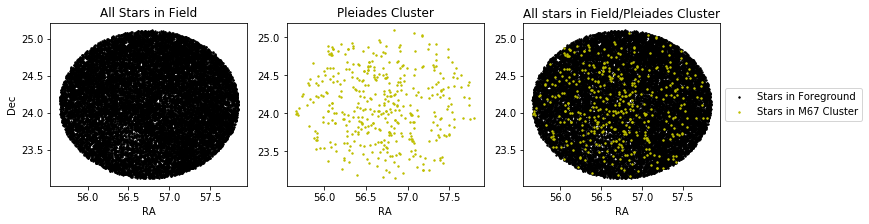

In [64]:
# Plot the three RA/Dec graphs

plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(data['ra'],data['dec'],s=2, color = 'k')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('All Stars in Field')


plt.subplot(1,3,2)
plt.scatter(data3['ra'],data3['dec'],s=2, color = 'y')
plt.xlabel('RA')
plt.title('Pleiades Cluster')


plt.subplot(1,3,3)
all_stars = plt.scatter(data['ra'],data['dec'],s=2, color = 'k')
cluster = plt.scatter(data3['ra'],data3['dec'],s=2, color = 'y')
plt.xlabel('RA')
plt.title('All stars in Field/Pleiades Cluster')
plt.legend([all_stars, cluster], ['Stars in Foreground', 'Stars in Pleiades Cluster'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

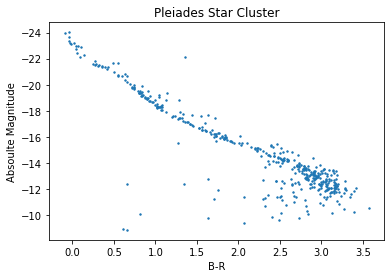

In [68]:
# Plot the HR diagram

plt.scatter(data3['bp_rp'],data3['abs_mag'],s=2)
plt.gca().invert_yaxis()
plt.xlabel("B-R")
plt.ylabel("Absoulte Magnitude")
plt.title("Pleiades Star Cluster")


# Analysis Questions

In [44]:
# 1.) Which B-R values corrispond to a star that are more blue? Which values corrrispond to stars that are more red?  
#
# 2.) How does the color of a star corrispond to the star's age?
#
# 3.) How do the positions of stars on the HR diagram show the cluster's age?
#
# 4.) Which cluster is older M67 or Pleiades? How can you tell?

# Conclusion

>In the cell below, write what you learned about HR Diagrmas, and how they can be used to classify stars.